<a href="https://colab.research.google.com/github/pankaj-beldar/Cetrifugal-pump-efficiency-regression/blob/main/Centrifugal_pump_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
df=pd.read_csv('/content/pump_data.csv')
df

,Pump_speed,Discharge_Pressure,suction_vaccum,time_10ltr_rise,time_energy_meter
0,2400,0.314062,217.204967,7.674189,19.532944
1,2400,0.315347,216.527019,7.715477,19.594521
2,2400,0.317305,215.504355,7.777347,19.686325
3,2400,0.320145,214.040616,7.865031,19.815415
4,2400,0.320182,214.021350,7.866178,19.817096
...,...,...,...,...,...
106,2400,0.704974,59.960621,19.766935,31.927412
107,2400,0.706329,58.952332,19.889347,32.090561
108,2400,0.707201,58.299136,19.968757,32.196565
109,2400,0.708113,57.612562,20.052314,32.308245


In [20]:
#discharge head hd in meter
def discharge_head(x):
  x=x*10
  return x

df['hd']=discharge_head(df.Discharge_Pressure)
df

,Pump_speed,Discharge_Pressure,suction_vaccum,time_10ltr_rise,time_energy_meter,hd
0,2400,0.314062,217.204967,7.674189,19.532944,3.140620
1,2400,0.315347,216.527019,7.715477,19.594521,3.153475
2,2400,0.317305,215.504355,7.777347,19.686325,3.173046
3,2400,0.320145,214.040616,7.865031,19.815415,3.201446
4,2400,0.320182,214.021350,7.866178,19.817096,3.201823
...,...,...,...,...,...,...
106,2400,0.704974,59.960621,19.766935,31.927412,7.049741
107,2400,0.706329,58.952332,19.889347,32.090561,7.063289
108,2400,0.707201,58.299136,19.968757,32.196565,7.072012
109,2400,0.708113,57.612562,20.052314,32.308245,7.081135


In [21]:
def suction_head(x):
  x=x*13.6/1000
  return x

df['hs']=suction_head(df.suction_vaccum)
df

,Pump_speed,Discharge_Pressure,suction_vaccum,time_10ltr_rise,time_energy_meter,hd,hs
0,2400,0.314062,217.204967,7.674189,19.532944,3.140620,2.953988
1,2400,0.315347,216.527019,7.715477,19.594521,3.153475,2.944767
2,2400,0.317305,215.504355,7.777347,19.686325,3.173046,2.930859
3,2400,0.320145,214.040616,7.865031,19.815415,3.201446,2.910952
4,2400,0.320182,214.021350,7.866178,19.817096,3.201823,2.910690
...,...,...,...,...,...,...,...
106,2400,0.704974,59.960621,19.766935,31.927412,7.049741,0.815464
107,2400,0.706329,58.952332,19.889347,32.090561,7.063289,0.801752
108,2400,0.707201,58.299136,19.968757,32.196565,7.072012,0.792868
109,2400,0.708113,57.612562,20.052314,32.308245,7.081135,0.783531


In [22]:
#Total Head, ht = hd + hs + hr
#Where, hr = 3 mtr. is the head loss due to friction
df['ht']= df.hd+ df.hs+3
df


,Pump_speed,Discharge_Pressure,suction_vaccum,time_10ltr_rise,time_energy_meter,hd,hs,ht
0,2400,0.314062,217.204967,7.674189,19.532944,3.140620,2.953988,9.094608
1,2400,0.315347,216.527019,7.715477,19.594521,3.153475,2.944767,9.098242
2,2400,0.317305,215.504355,7.777347,19.686325,3.173046,2.930859,9.103906
3,2400,0.320145,214.040616,7.865031,19.815415,3.201446,2.910952,9.112399
4,2400,0.320182,214.021350,7.866178,19.817096,3.201823,2.910690,9.112514
...,...,...,...,...,...,...,...,...
106,2400,0.704974,59.960621,19.766935,31.927412,7.049741,0.815464,10.865205
107,2400,0.706329,58.952332,19.889347,32.090561,7.063289,0.801752,10.865041
108,2400,0.707201,58.299136,19.968757,32.196565,7.072012,0.792868,10.864880
109,2400,0.708113,57.612562,20.052314,32.308245,7.081135,0.783531,10.864666


In [23]:
def discharge(t):
  x=0.47*0.300*0.100/t                      #discharge is in m3/sec
  return x

df['discharge']= discharge(df.time_10ltr_rise)
df


,Pump_speed,Discharge_Pressure,suction_vaccum,time_10ltr_rise,time_energy_meter,hd,hs,ht,discharge
0,2400,0.314062,217.204967,7.674189,19.532944,3.140620,2.953988,9.094608,0.001837
1,2400,0.315347,216.527019,7.715477,19.594521,3.153475,2.944767,9.098242,0.001827
2,2400,0.317305,215.504355,7.777347,19.686325,3.173046,2.930859,9.103906,0.001813
3,2400,0.320145,214.040616,7.865031,19.815415,3.201446,2.910952,9.112399,0.001793
4,2400,0.320182,214.021350,7.866178,19.817096,3.201823,2.910690,9.112514,0.001792
...,...,...,...,...,...,...,...,...,...
106,2400,0.704974,59.960621,19.766935,31.927412,7.049741,0.815464,10.865205,0.000713
107,2400,0.706329,58.952332,19.889347,32.090561,7.063289,0.801752,10.865041,0.000709
108,2400,0.707201,58.299136,19.968757,32.196565,7.072012,0.792868,10.864880,0.000706
109,2400,0.708113,57.612562,20.052314,32.308245,7.081135,0.783531,10.864666,0.000703


In [24]:
def output_power(x,y):
  z= 1000*x*9.8*y/1000                             #power is in kw
  return z

df['output_power'] =output_power(df.discharge, df.ht)
df

,Pump_speed,Discharge_Pressure,suction_vaccum,time_10ltr_rise,time_energy_meter,hd,hs,ht,discharge,output_power
0,2400,0.314062,217.204967,7.674189,19.532944,3.140620,2.953988,9.094608,0.001837,0.163756
1,2400,0.315347,216.527019,7.715477,19.594521,3.153475,2.944767,9.098242,0.001827,0.162945
2,2400,0.317305,215.504355,7.777347,19.686325,3.173046,2.930859,9.103906,0.001813,0.161749
3,2400,0.320145,214.040616,7.865031,19.815415,3.201446,2.910952,9.112399,0.001793,0.160095
4,2400,0.320182,214.021350,7.866178,19.817096,3.201823,2.910690,9.112514,0.001792,0.160074
...,...,...,...,...,...,...,...,...,...,...
106,2400,0.704974,59.960621,19.766935,31.927412,7.049741,0.815464,10.865205,0.000713,0.075953
107,2400,0.706329,58.952332,19.889347,32.090561,7.063289,0.801752,10.865041,0.000709,0.075484
108,2400,0.707201,58.299136,19.968757,32.196565,7.072012,0.792868,10.864880,0.000706,0.075183
109,2400,0.708113,57.612562,20.052314,32.308245,7.081135,0.783531,10.864666,0.000703,0.074868


In [25]:
def electric_input_power(x):
  p= 5*3600/1600/x
  return p

df['input_power']= electric_input_power(df.time_energy_meter)
df

,Pump_speed,Discharge_Pressure,suction_vaccum,time_10ltr_rise,time_energy_meter,hd,hs,ht,discharge,output_power,input_power
0,2400,0.314062,217.204967,7.674189,19.532944,3.140620,2.953988,9.094608,0.001837,0.163756,0.575950
1,2400,0.315347,216.527019,7.715477,19.594521,3.153475,2.944767,9.098242,0.001827,0.162945,0.574140
2,2400,0.317305,215.504355,7.777347,19.686325,3.173046,2.930859,9.103906,0.001813,0.161749,0.571463
3,2400,0.320145,214.040616,7.865031,19.815415,3.201446,2.910952,9.112399,0.001793,0.160095,0.567740
4,2400,0.320182,214.021350,7.866178,19.817096,3.201823,2.910690,9.112514,0.001792,0.160074,0.567692
...,...,...,...,...,...,...,...,...,...,...,...
106,2400,0.704974,59.960621,19.766935,31.927412,7.049741,0.815464,10.865205,0.000713,0.075953,0.352362
107,2400,0.706329,58.952332,19.889347,32.090561,7.063289,0.801752,10.865041,0.000709,0.075484,0.350570
108,2400,0.707201,58.299136,19.968757,32.196565,7.072012,0.792868,10.864880,0.000706,0.075183,0.349416
109,2400,0.708113,57.612562,20.052314,32.308245,7.081135,0.783531,10.864666,0.000703,0.074868,0.348208


In [26]:
df['overall_efficiency']= df.output_power/ df.input_power
df

,Pump_speed,Discharge_Pressure,suction_vaccum,time_10ltr_rise,time_energy_meter,hd,hs,ht,discharge,output_power,input_power,overall_efficiency
0,2400,0.314062,217.204967,7.674189,19.532944,3.140620,2.953988,9.094608,0.001837,0.163756,0.575950,0.284323
1,2400,0.315347,216.527019,7.715477,19.594521,3.153475,2.944767,9.098242,0.001827,0.162945,0.574140,0.283806
2,2400,0.317305,215.504355,7.777347,19.686325,3.173046,2.930859,9.103906,0.001813,0.161749,0.571463,0.283044
3,2400,0.320145,214.040616,7.865031,19.815415,3.201446,2.910952,9.112399,0.001793,0.160095,0.567740,0.281986
4,2400,0.320182,214.021350,7.866178,19.817096,3.201823,2.910690,9.112514,0.001792,0.160074,0.567692,0.281973
...,...,...,...,...,...,...,...,...,...,...,...,...
106,2400,0.704974,59.960621,19.766935,31.927412,7.049741,0.815464,10.865205,0.000713,0.075953,0.352362,0.215553
107,2400,0.706329,58.952332,19.889347,32.090561,7.063289,0.801752,10.865041,0.000709,0.075484,0.350570,0.215318
108,2400,0.707201,58.299136,19.968757,32.196565,7.072012,0.792868,10.864880,0.000706,0.075183,0.349416,0.215167
109,2400,0.708113,57.612562,20.052314,32.308245,7.081135,0.783531,10.864666,0.000703,0.074868,0.348208,0.215010


<Axes: xlabel='discharge', ylabel='ht'>

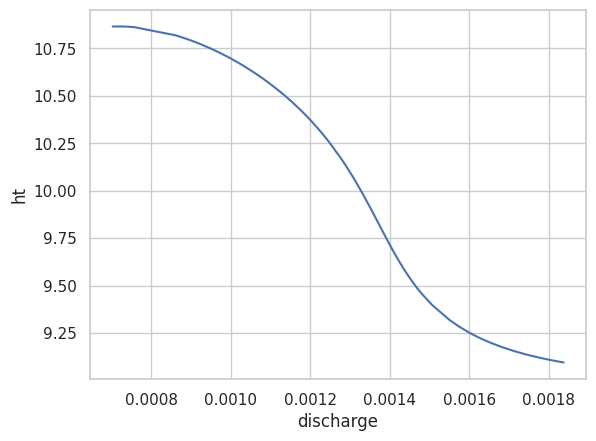

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x='discharge', y='ht', data=df, )


<Axes: xlabel='discharge', ylabel='overall_efficiency'>

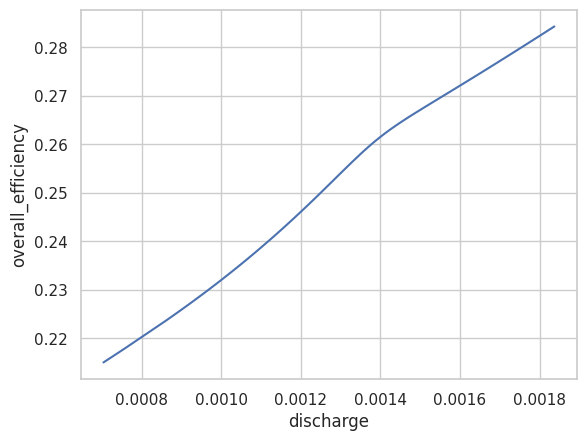

In [28]:
sns.lineplot(x='discharge', y='overall_efficiency', data=df, )

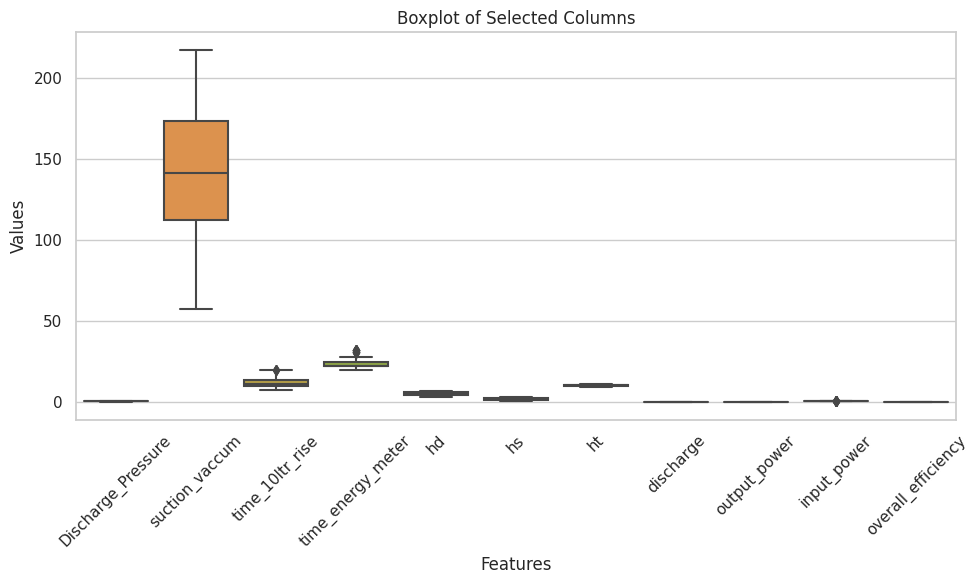

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
selected_columns = [ 'Discharge_Pressure', 'suction_vaccum', 'time_10ltr_rise', 'time_energy_meter',
                    'hd', 'hs', 'ht', 'discharge', 'output_power', 'input_power', 'overall_efficiency']

# Create a boxplot for selected columns in the DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(data=df[selected_columns])

plt.title("Boxplot of Selected Columns")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame containing the data
# X contains the features, y contains the target variable
X = df[['Pump_speed', 'Discharge_Pressure', 'suction_vaccum', 'time_10ltr_rise', 'time_energy_meter',
        'hd', 'hs', 'ht', 'discharge', 'output_power', 'input_power']]
y = df['overall_efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 4.869373132136833e-10
R^2 Score: 0.9999987532553392


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame containing the data
# X contains the features, y contains the target variable
X = df[['Pump_speed', 'Discharge_Pressure', 'suction_vaccum', 'time_10ltr_rise', 'time_energy_meter',
        'hd', 'hs', 'ht', 'discharge', 'output_power', 'input_power']]
y = df['overall_efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different regression algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),

    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'Model: {name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    print('-' * 40)


Model: Linear Regression
Mean Squared Error: 4.869373132136833e-10
R^2 Score: 0.9999987532553392
----------------------------------------
Model: Random Forest
Mean Squared Error: 1.414856878029739e-07
R^2 Score: 0.9996377428447674
----------------------------------------
Model: K-Nearest Neighbors
Mean Squared Error: 5.009670464019357e-07
R^2 Score: 0.99871733388788
----------------------------------------


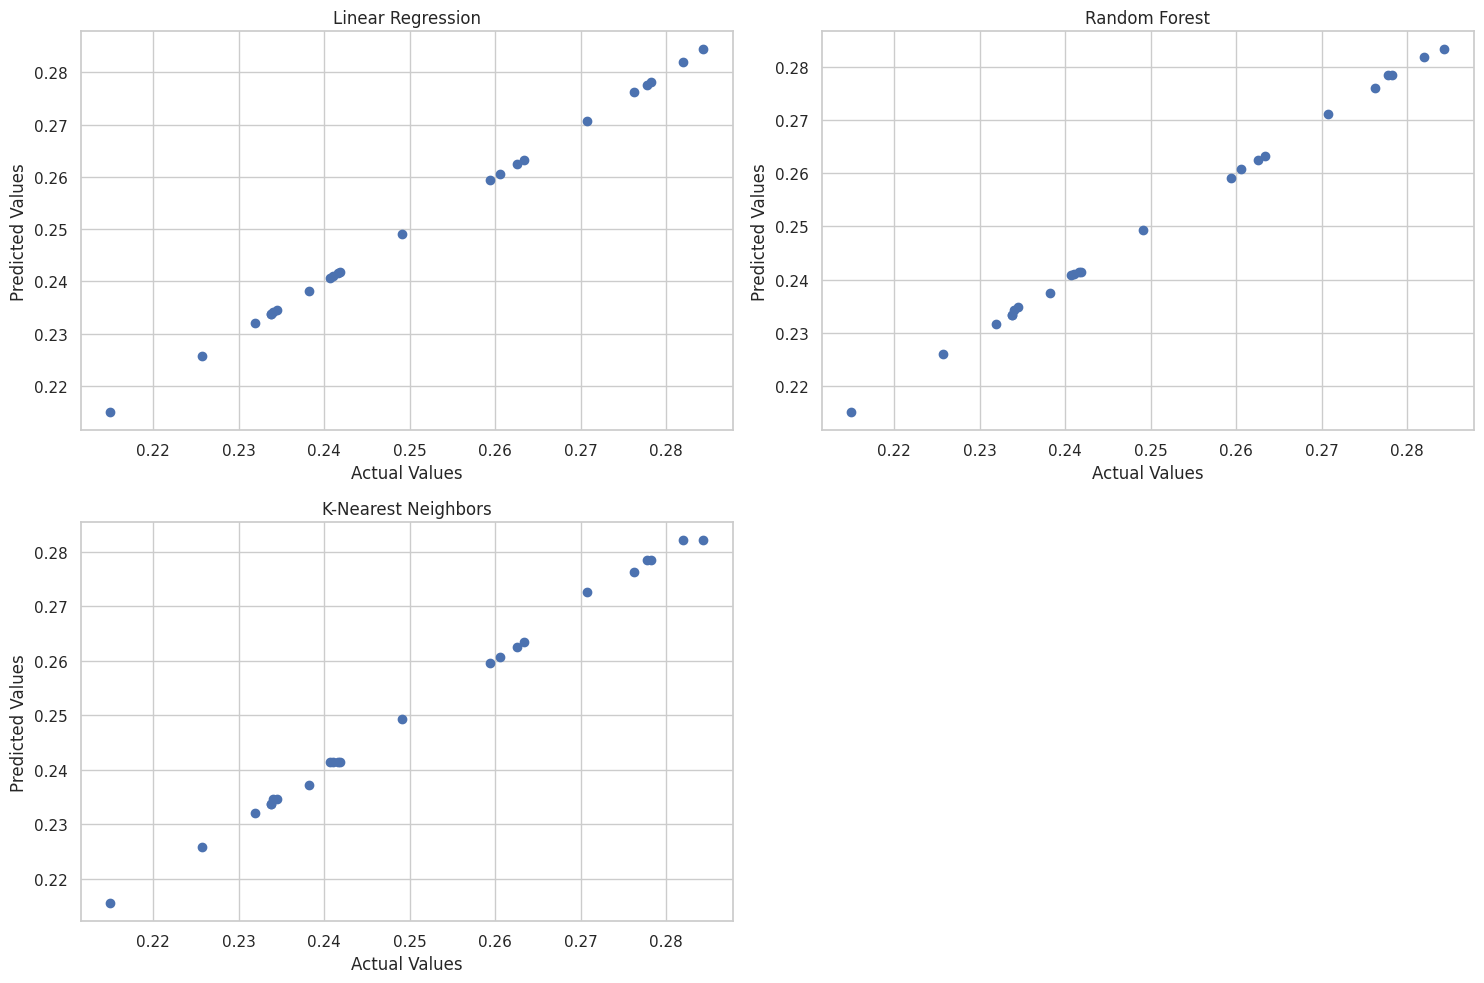

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame containing the data
# X contains the features, y contains the target variable
X = df[['Pump_speed', 'Discharge_Pressure', 'suction_vaccum', 'time_10ltr_rise', 'time_energy_meter',
        'hd', 'hs', 'ht', 'discharge', 'output_power', 'input_power']]
y = df['overall_efficiency']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize different regression algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),

    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train each model and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

# Visualize predictions
plt.figure(figsize=(15, 10))

for i, (name, preds) in enumerate(predictions.items(), start=1):
    plt.subplot(2, 2, i)
    plt.scatter(y_test, preds)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(name)
    plt.grid(True)

plt.tight_layout()
plt.show()
